# **FIT3152 Data analytics. Tutorial 06**

# **Pre-tutorial Activity**
1. Read the data from the file “Ped_Count_December_2021.csv” into a data frame named
“December”. Run the command “December[3:83] = lapply(December[3:83], as.numeric)” to
convert the relevant column values to numeric. Answer the following questions by performing
the necessary data transformations, manipulations and visualisations in R.

In [ ]:
#install.packages("googledrive")
library(googledrive)

#Q1
library(tidyr)
library(ggplot2)
library(dplyr)
December = read.csv('/content/sample_data/Ped_Count_December_2021.csv')
head(December)
December[3:83] = lapply(December[3:83], as.numeric)#Numeric data type stores numbers with decimal points.
head(December)
str(December)

# Tidy the data by transforming it from the current wide format into a long format.




In [ ]:
DEC_Long = December %>% pivot_longer(cols=3:83, names_to = 'Sensor_Location', values_to = 'Count')
head(DEC_Long)

Date,Hour,Sensor_Location,Count
<chr>,<int>,<chr>,<dbl>
01/12/2021,0,Bourke.Street.Mall..North.,97
01/12/2021,0,Bourke.Street.Mall..South.,59
01/12/2021,0,Melbourne.Central,269
01/12/2021,0,Town.Hall..West.,137
01/12/2021,0,Princes.Bridge,176
01/12/2021,0,Flinders.Street.Station.Underpass,133


## Compare hourly pedestrian count distributions at locations Melborne.Central and Southern.Cross.Station using box plots

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”


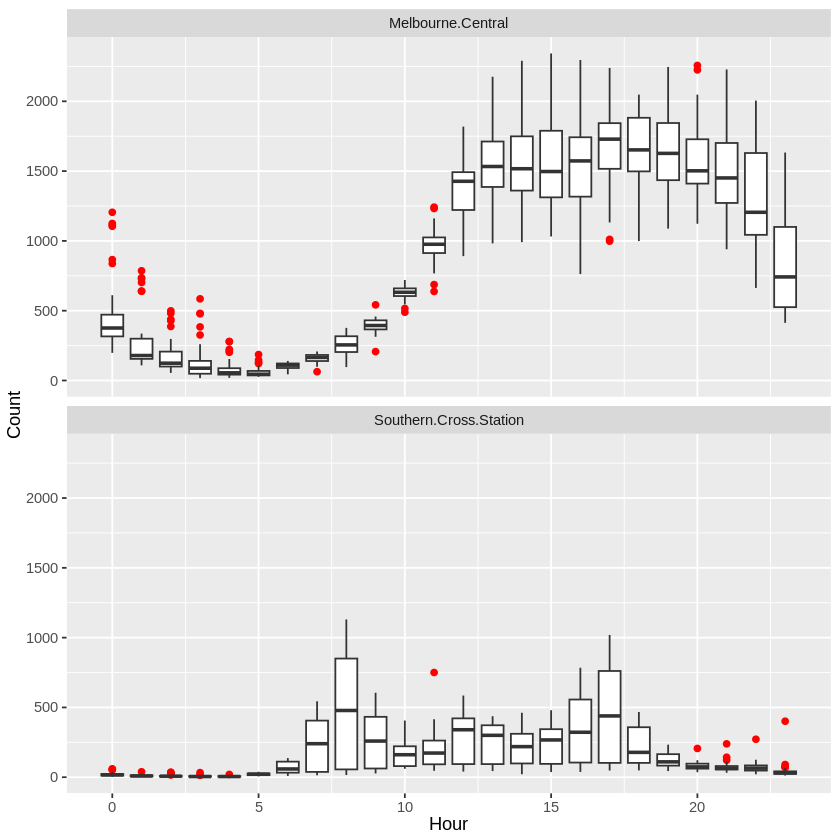

In [ ]:
# filter() function from the dplyr package.
DEC_Long %>% filter(Sensor_Location %in% c("Melbourne.Central","Southern.Cross.Station"))  %>% ggplot(aes(x = Hour, y = Count, group =
      Hour)) + geom_boxplot(outlier.color = "red") +
  facet_wrap(~Sensor_Location, ncol=1)

***Try to do this***
# **Compare hourly pedestrian count distributions at The.Arts.Centre and Southbank.**

Warning message:
“Removed 36 rows containing non-finite values (`stat_boxplot()`).”


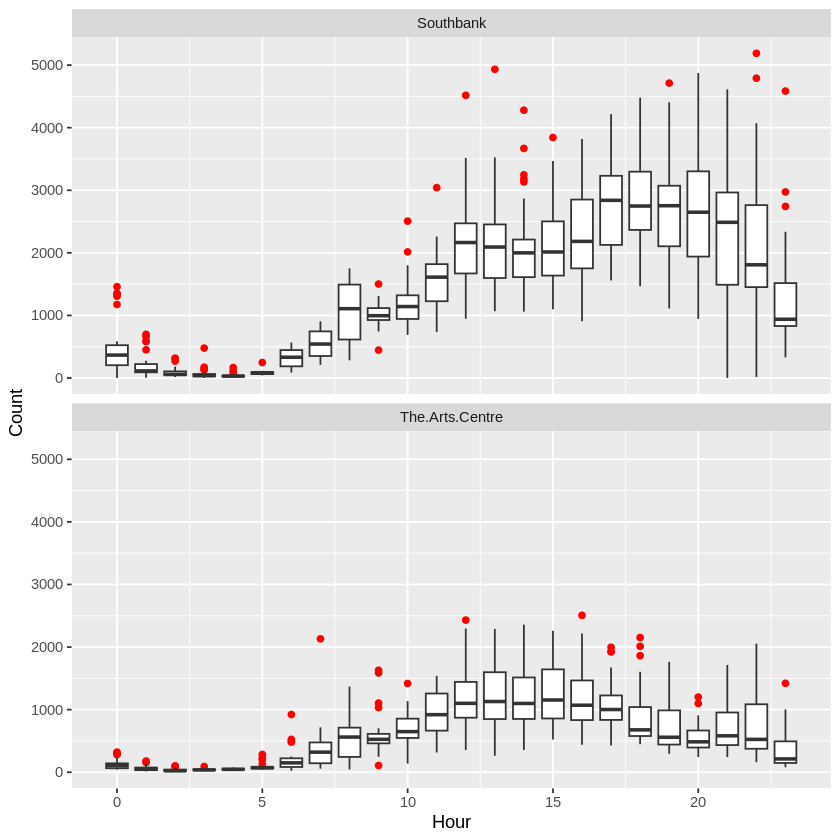

In [ ]:
DEC_Long %>% filter(Sensor_Location %in% c("The.Arts.Centre", "Southbank")) %>%ggplot(aes(x = Hour, y = Count, group = Hour)) +
  geom_boxplot(outlier.color = "red") + facet_wrap(~Sensor_Location, ncol=1)

**Find the date and location where the daily pedestrian count is at its highest during the first half of the month. Does the location change if the analysis is performed on the second half of the month?**


In [ ]:
#Extract data relating to the first half of the month and the second half of the month
D1 =DEC_Long[as.Date(DEC_Long$Date, "%d/%m/%y") < as.Date("16/12/2021",
                                                          "%d/%m/%y"),]
D2 =DEC_Long[as.Date(DEC_Long$Date, "%d/%m/%y") > as.Date("15/12/2021",
                                                          "%d/%m/%y"),]

# Grouping the data by both Date and Sensor_Location allows for calculating the total pedestrian count for each unique combination
#of date and location,

#Calculate the daily sum of pedestrian counts at different locations for the two sets of extracted data
D1 %>% group_by(Date, Sensor_Location) %>% summarise(Daily_Count =  sum(Count, na.rm = TRUE)) %>% arrange(desc(Daily_Count)) %>% head(n=1)
D2 %>% group_by(Date, Sensor_Location) %>% summarise(Daily_Count =
                                                       sum(Count, na.rm = TRUE)) %>% arrange(desc(Daily_Count)) %>% head(n=1)
#Location is unchanged and is southbank for both time periods

`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


Date,Sensor_Location,Daily_Count
<chr>,<chr>,<dbl>
11/12/2021,Southbank,53612


`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


Date,Sensor_Location,Daily_Count
<chr>,<chr>,<dbl>
18/12/2021,Southbank,49599


**Using lecture notes and/or Chapter 12 of R for Data Science http://r4ds.had.co.nz/ as a guide, manually transform the table below to put it into tidy form. Write out the first 10 or so lines of the transformed table**

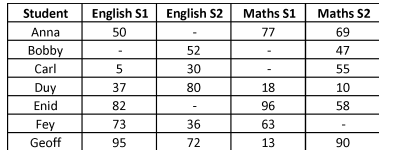

In [ ]:
library(stringr)
Students <- c('Anna','Bobby','Carl')
English.S1 <- c(50, '-', 5)
English.S2 <- c('-', 52, 30)
Math.S1 <- c(77,'-','-')
Math.S2 <- c(69,47,55)
#When you use cbind with vectors, it binds them together to form a matrix or data frame, where each vector becomes a column
Grades <- as.data.frame(cbind(Students,English.S1,English.S2,Math.S1,Math.S2))
Grades
str(Grades)
Grades[Grades=='-']<- 0
Grades[2:5] = lapply (Grades[2:5], as.numeric)
Grades
tidyDf <- Grades %>%
  pivot_longer(cols = -Students, names_to = "UnitName", values_to = "Grade")

tidyDf$Semester <- str_sub(tidyDf$UnitName, -2)
tidyDf$UnitName <- str_sub(tidyDf$UnitName, 1,-4)
tidyDf[order(tidyDf$Students),]
tidyDf[order(tidyDf$Grade,decreasing = TRUE),]
tidyDf[order(tidyDf$Students,-tidyDf$Grade),]
tidyDf


Students,English.S1,English.S2,Math.S1,Math.S2
<chr>,<chr>,<chr>,<chr>,<chr>
Anna,50,-,77,69
Bobby,-,52,-,47
Carl,5,30,-,55


'data.frame':	3 obs. of  5 variables:
 $ Students  : chr  "Anna" "Bobby" "Carl"
 $ English.S1: chr  "50" "-" "5"
 $ English.S2: chr  "-" "52" "30"
 $ Math.S1   : chr  "77" "-" "-"
 $ Math.S2   : chr  "69" "47" "55"


Students,English.S1,English.S2,Math.S1,Math.S2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anna,50,0,77,69
Bobby,0,52,0,47
Carl,5,30,0,55


Students,UnitName,Grade,Semester
<chr>,<chr>,<dbl>,<chr>
Anna,English,50,S1
Anna,English,0,S2
Anna,Math,77,S1
Anna,Math,69,S2
Bobby,English,0,S1
Bobby,English,52,S2
Bobby,Math,0,S1
Bobby,Math,47,S2
Carl,English,5,S1


Students,UnitName,Grade,Semester
<chr>,<chr>,<dbl>,<chr>
Anna,Math,77,S1
Anna,Math,69,S2
Carl,Math,55,S2
Bobby,English,52,S2
Anna,English,50,S1
Bobby,Math,47,S2
Carl,English,30,S2
Carl,English,5,S1
Anna,English,0,S2


Students,UnitName,Grade,Semester
<chr>,<chr>,<dbl>,<chr>
Anna,Math,77,S1
Anna,Math,69,S2
Anna,English,50,S1
Anna,English,0,S2
Bobby,English,52,S2
Bobby,Math,47,S2
Bobby,English,0,S1
Bobby,Math,0,S1
Carl,Math,55,S2


Students,UnitName,Grade,Semester
<chr>,<chr>,<dbl>,<chr>
Anna,English,50,S1
Anna,English,0,S2
Anna,Math,77,S1
Anna,Math,69,S2
Bobby,English,0,S1
Bobby,English,52,S2
Bobby,Math,0,S1
Bobby,Math,47,S2
Carl,English,5,S1


Q5

a) Using the customer spend data from the beginning of September 2010 to the end of March 2011 investigate whether there is any difference between the amount spent by customers having the most predictable relationship for time between visits vs spend, and the least.

To do this first calculate the coefficient of determination (r2
) of visit_delta and visit_spend for each customer. Using r2 as your criterion create two groups of 10 customers: those with the
most predictable visit_spend vs visit_delta (highest r2 ) and those with the lowest. By comparing the average spend of customers in each group determine whether it is possible to see a difference between groups. Is this difference significant? At what level?

In [ ]:
#Q5a
#install.packages('plyr')
rm(list = ls())
library(ggplot2)
library(plyr)
D = read.csv("/content/sample_data/Dunnhumby1-20.csv", header = T)

# Convert visit_date to Date type
D$visit_date <- as.Date(D$visit_date, format = "%d/%m/%Y")
#create a new data frame from September 2010 to March 2011
DHX <- D[D$visit_date >= as.Date("2010-09-01") & D$visit_date <= as.Date("2011-03-31"), ]
attach(DHX)
#Fit linear models between visit_spend and Visit_delta for each customer id
#by() function splits the data frame DHX by customer_id and applies a function to each subset.
#The function passed to by() fits a linear model (lm()) for each subset.
Models = by(DHX, DHX$customer_id, function(df)
  lm(df$visit_spend~df$visit_delta))
#llply() from the plyr package to summarize the model statistics for each customer.
Summary = llply(Models, summary,.print = TRUE) # get list of model summaries


The following objects are masked from DHX (pos = 3):

    customer_id, visit_date, visit_delta, visit_spend




In [ ]:

# get ordered r.squared values from summary list
#[[ operator is used to extract the r.squared value, which is the 8th element in the summary object.
#sapply() applies this operation to each element of Summary, resulting in a vector of r.squared values.
R = as.data.frame(as.table(sapply(Summary, '[[', 8)))
R_ordered = R[order(R$Freq),]
colnames(R_ordered) = c("customer_id", "r squared")
#group 10 most predictable and least predictable customers
lowest10 = R_ordered[1:10,]
highest10 = R_ordered[11:20,]
LOW = D[(D$customer_id %in% lowest10$customer_id),]
HIGH = D[(D$customer_id %in% highest10$customer_id),]
#get average spend for low and high groups
#The aggregate function is used to calculate summary statistics on data.
#LOW[4] corresponds to the spend values.LOW[1]:contains the customer IDs.
#the line calculates the average spend for each customer in the LOW group, grouping the data by customer ID.
LOW_AVG = aggregate(LOW[4], LOW[1], mean)
HIGH_AVG = aggregate(HIGH[4], HIGH[1], mean)
#check significance of difference in avg spend
#t.test: This function performs a Student's t-test to compare the means of two groups.
#"greater": the alternative hypothesis is that the mean spend of the HIGH_AVG group is greater than that of the LOW_AVG group.
print(t.test(HIGH_AVG[2], LOW_AVG[2], "greater", conf.level = 0.99))

#Since the p-value (0.08725) is greater than the significance level of 0.01 (associated with a 99% confidence level),
#we fail to reject the null hypothesis. This means that we do not have sufficient evidence
#to conclude that the mean spend of the HIGH_AVG group is significantly greater than that of the LOW_AVG group at a 99% confidence level.



	Welch Two Sample t-test

data:  HIGH_AVG[2] and LOW_AVG[2]
t = 1.4145, df = 17.771, p-value = 0.08725
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 -9.991826       Inf
sample estimates:
mean of x mean of y 
 51.15235  38.76634 




# **Q6 **
Using the 30 minute general supply, calculate the daily supply for each meter for every day there is
data available. Because the number of records is unreliable you will also need to count the
number of daily observations for each (day, meter). You should then discard any (day, meter) readings that do not have the complete number of observations.
Draw a boxplot of the daily consumption for each meter in January 2013 by meter.

In [ ]:

library(ggplot2)
GH <- read.csv("/content/sample_data/govhackelectricitytimeofusedataset.csv")
GH = GH[,1:3]
colnames(GH) = c("ID", "DateTime", "Consumption")
# Extract date
GH$Date = as.Date(GH$DateTime,format = "%d/%m/%Y")
GH$DateTime = NULL
GHX = GH[as.Date(GH$Date,"%Y-%m-%d") > as.Date("2012-12-31","%Y-%m-%d"),]
GHX = GHX[as.Date(GHX$Date,"%Y-%m-%d") < as.Date("2013-02-01","%Y-%m-%d"),]
attach(GHX)
head(GHX)

The following objects are masked from GHX (pos = 3):

    Consumption, Date, ID


The following objects are masked from GHX (pos = 4):

    Consumption, Date, ID




,ID,Consumption,Date
,<int>,<dbl>,<date>
48075,8342962,0.248,2013-01-22
48076,8342962,0.289,2013-01-22
48077,8342962,0.321,2013-01-22
48078,8342962,4.172,2013-01-22
48079,8342962,3.946,2013-01-22
48080,8342962,3.902,2013-01-22


In [ ]:
GHDayCons = as.data.frame(as.table(by(Consumption, list(Date, ID), sum)))
GHDayCount = as.data.frame(as.table(by(Consumption, list(Date, ID), length)))
GHDay = cbind(GHDayCons,GHDayCount)
GHDay = GHDay[,c(1,2,3,6)]
colnames(GHDay) = c("Date", "ID", "Cons", "N")
head(GHDay)
rm(GHDayCons)
rm(GHDayCount)
rm(GH)
detach(GHX)
rm(GHX)

,Date,ID,Cons,N
,<fct>,<fct>,<dbl>,<int>
1,2013-01-01,8342962,NA,NA
2,2013-01-02,8342962,NA,NA
3,2013-01-03,8342962,NA,NA
4,2013-01-04,8342962,NA,NA
5,2013-01-05,8342962,NA,NA
6,2013-01-06,8342962,NA,NA


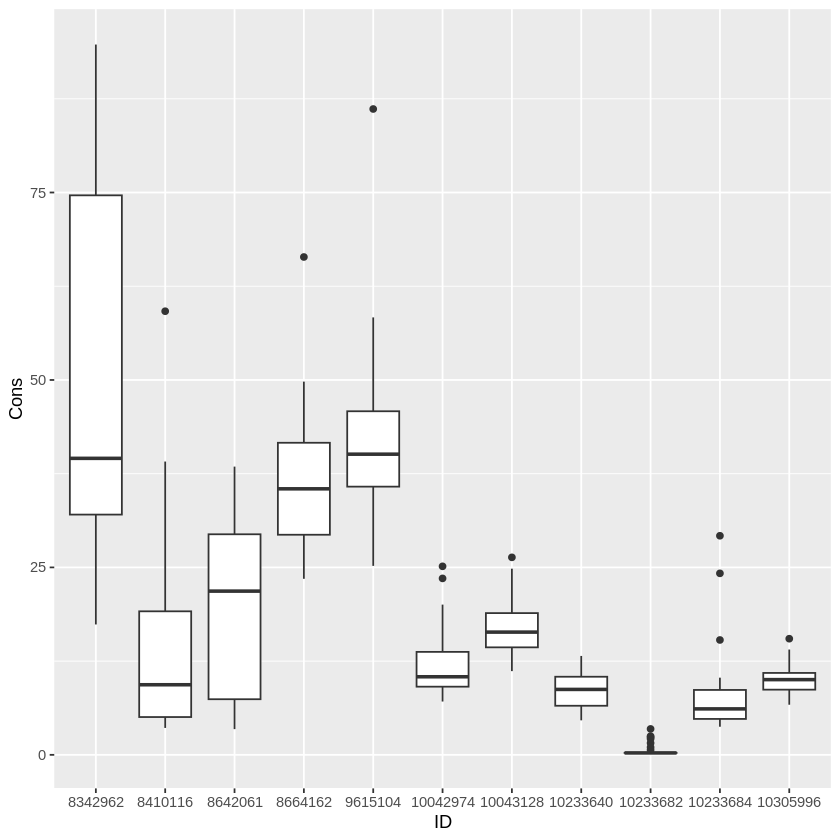

In [ ]:


# remove NA days
GHDay = GHDay[complete.cases(GHDay), ]
# keep only days with 48 observations
GHDay = GHDay[GHDay$N == 48,]
# Plot all data, ignoring incomplete months
g = ggplot(GHDay, aes(ID, Cons)) + geom_boxplot()
g
ggsave("Jan 2013 Cons All.pdf", g, width = 20, height = 12, unit = "cm")


Extension, now exclude those meters that do not have a complete set of readings over the month of January (that is 31 days).

The following objects are masked from GHX (pos = 3):

    Date, ID


The following objects are masked from GHX (pos = 4):

    Date, ID




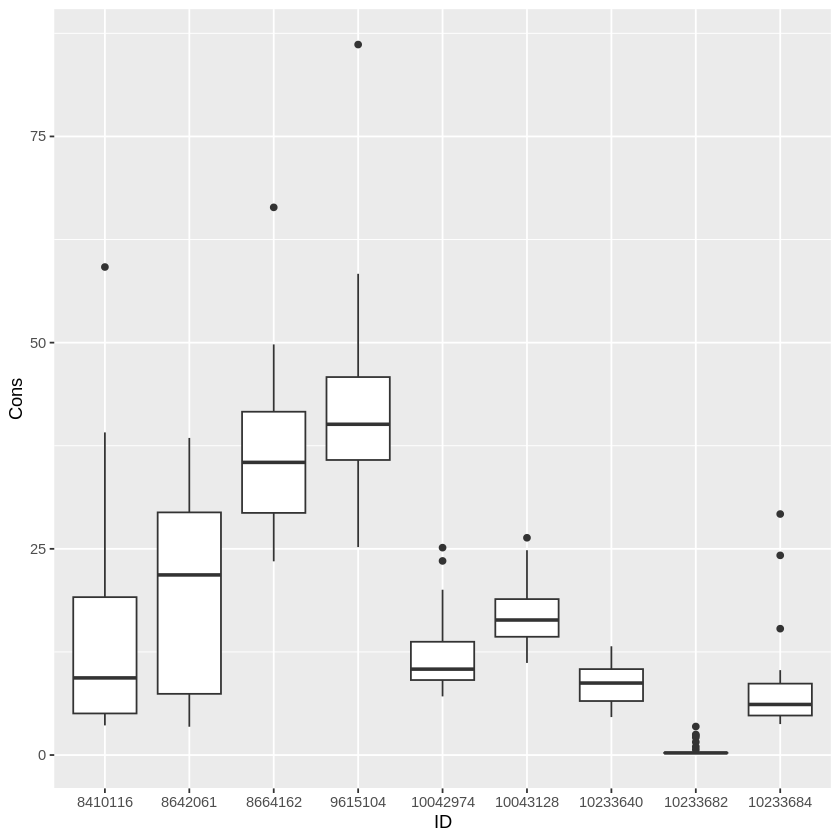

In [ ]:
# to exclude incomplete months..
attach(GHDay)
# count number of days
DayCount = as.data.frame(as.table(by(Cons, ID, length)))
# remove days less than 31
DayCount = DayCount[DayCount$Freq == 31,]
# now keep only those IDs with 31 days
GHDay = GHDay[(GHDay$ID %in% DayCount$ID),]
g = ggplot(GHDay, aes(ID, Cons)) + geom_boxplot()
g
ggsave("Jan 2013 Cons Complete.pdf", g, width = 20, height = 12, unit = "cm")

Q7

Analyse the Anscombe data set (anscombe). This data set is part of the base R installation and consists of 4 pairs of x,y observations.

(a) Using summary statistics and correlation describe the main similarities and differences between the pairs.

(b) Now, using some visual analysis describe the similarities and differences between the pairs

In [ ]:
#load the required libraries for statistical functions and graphical plotting.
require(stats); require(graphics)
summary(anscombe)
##-- now some "magic" to do the 4 regressions in a loop:
ff <- y ~ x
mods <- setNames(as.list(1:4), paste0("lm", 1:4))#This initializes a list mods to store the LR models, with names "lm1" to "lm4".
for(i in 1:4) {#This loop iterates over each of the four pairs of x and y observations
#Update the formula ff with the appropriate variable names for the current pair of x and y observations.
  ff[2:3] <- lapply(paste0(c("y","x"), i), as.name)# in the first iteration ff becomes y1 ~ x1

  mods[[i]] <- lmi <- lm(ff, data = anscombe)
  print(anova(lmi))
}
## See how close they are (numerically!)
#extracts the coefficients of each LR model stored in the mods list and presents them in a matrix format.
sapply(mods, coef)

lapply(mods, function(fm) coef(summary(fm)))





       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

Analysis of Variance Table

Response: y1
          Df Sum Sq Mean Sq F value  Pr(>F)   
x1         1 27.510 27.5100   17.99 0.00217 **
Residuals  9 13.763  1.5292                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y2
          Df Sum Sq Mean Sq F value   Pr(>F)   
x2         1 27.500 27.5000  17.966 0.002179 **
Residuals  9 13.776  1.5307                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y3
          Df Sum Sq Mean Sq F value   Pr(>F)   
x3         1 27.470 27.4700  17.972 0.002176 **
Residuals  9 13.756  1.5285                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table

Response: y4
          Df Sum Sq Mean Sq F value   Pr(>F)   
x4         1 27.490 27.4900  18.003 0.002165 **
Residuals  9 13.742  1.5269                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

,lm1,lm2,lm3,lm4
(Intercept),3.0000909,3.000909,3.0024545,3.0017273
x1,0.5000909,0.500000,0.4997273,0.4999091


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0000909,1.1247468,2.667348,0.025734051
x1,0.5000909,0.1179055,4.241455,0.002169629
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.000909,1.1253024,2.666758,0.025758941
x2,0.500000,0.1179637,4.238590,0.002178816
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0024545,1.1244812,2.670080,0.025619109
x3,0.4997273,0.1178777,4.239372,0.002176305
,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.0017273,1.1239211,2.670763,0.025590425


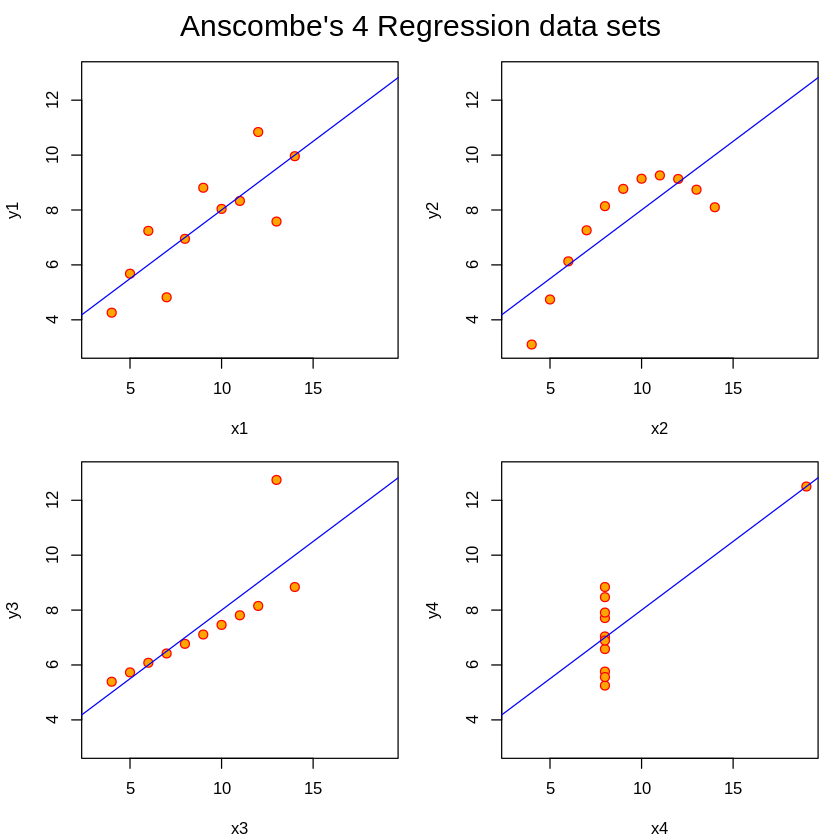

In [ ]:
## Now, do what you should have done in the first place: PLOTS
op <- par(mfrow = c(2, 2), mar = 0.1+c(4,4,1,1), oma = c(0, 0, 2, 0))
for(i in 1:4) {
  ff[2:3] <- lapply(paste0(c("y","x"), i), as.name)
  plot(ff, data = anscombe, col = "red", pch = 21, bg = "orange", cex =
         1.2,
       xlim = c(3, 19), ylim = c(3, 13))
  abline(mods[[i]], col = "blue")
}
mtext("Anscombe's 4 Regression data sets", outer = TRUE, cex = 1.5)
par(op)
## Conclusion
#The statistical information for these four data sets are approximately similar ( mean,std,..). (using the summary only)
#However, when these models are plotted on a scatter plot, each data set generates a different kind of plot
#Data Set 1: fits the linear regression model pretty well.
#Data Set 2: cannot fit the linear regression model because the data is non-linear.
#Data Set 3: shows the outliers involved in the data set, which cannot be handled by the linear regression model.
#Data Set 4: shows the outliers involved in the data set, which also cannot be handled by the linear regression model.
# This tells us about the importance of visualizing the data before building models to  identify the various anomalies present in the data
#(outliers, diversity of the data, linear separability of the data, etc.)